In [3]:
import numpy as np
import pandas as pd
import cv2
!pip install utils
import utils
import os
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.pyplot import figure
import tensorflow as tf

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


I read in the data from my csv file first

In [4]:
# data
data = pd.read_csv('gdrive/My Drive/Emotion_dataset_1.csv')  # path of the .csv file
print(data.shape)  # to check the shape
print(data.head(5))  # print the first 5 lines of the data

(35887, 3)
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


I know the number of "unique" emotions there are in the csv file, but i dont know the types of emotions. Looks like i have to determin them by myself.

I didnt know what were the dimensions of my image so I counted the number of white spaces in the string and added 1 to that numnber. I got 2304. perform math.sqrt(2304) and you'll get 48. Meaning the image is 48x48.

In [5]:
face = data.iloc[0]['pixels']  # remove one row from the data
count = 0
for i in face:
  if i != ' ':
    continue
  else:
    count += 1

math.sqrt(count + 1)

48.0

The data in the csv file was rather poor, so i had to do some processing by myself. The data in the csv file was as a string, so **I had to change the "pixels" in the csv file from a String to a 1D array to a 2D array** before I could call plt.imshow to show an image to determine the emotion. 

In [6]:
# make all the spaces (" ") into commas (",")
face = face.replace(" ", ",")

# split the string by commas so we can get "70, 50, 30, ..., 50, 123" 
                                  # to "70", "50", "30", ... "50", "123"
face = face.split(",")

# change it to a numpy array
face = np.array(face)
# change the elemnts in the numpy array from string to int
face = face.astype(float)
# rehape the 1D array of 2304 to a 2D array whereby its dimensions are 48x48
face = np.reshape(face, (48, 48))
face

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]])

Now i can show my image

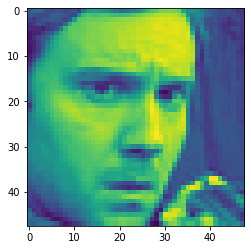

In [7]:
plt.imshow(face)

We now know how to chnage the data to a representable form, so lets change all the pixel values in the dataframe from string to a 2D array.

In [8]:
for i in range(len((data['pixels']))):
  face = data['pixels'][i]
  # make all the spaces (" ") into commas (",")
  face = face.replace(" ", ",")
  
  # split the string by commas so we can get "70, 50, 30, ..., 50, 123" 
                                  # to "70", "50", "30", ... "50", "123"
  face = face.split(",")
  
  # change it to a numpy array
  face = np.array(face)
  # change the elemnts in the numpy array from string to int
  face = face.astype(float)
  # rehape the 1D array of 2304 to a 2D array whereby its dimensions are 48x48
  face = np.reshape(face, (48, 48))
  data['pixels'][i] = face

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Lets generate 3 images for each of the emotions in this dataset so we can give them a tag value (Happy, sad, ect...) to each emotion.

To do that we have to first find out how many 'unique' emotions we have.

In [9]:
print(data['emotion'].unique())

[0 2 4 6 3 5 1]


So, we have 7 emotions. We can start generating the images now

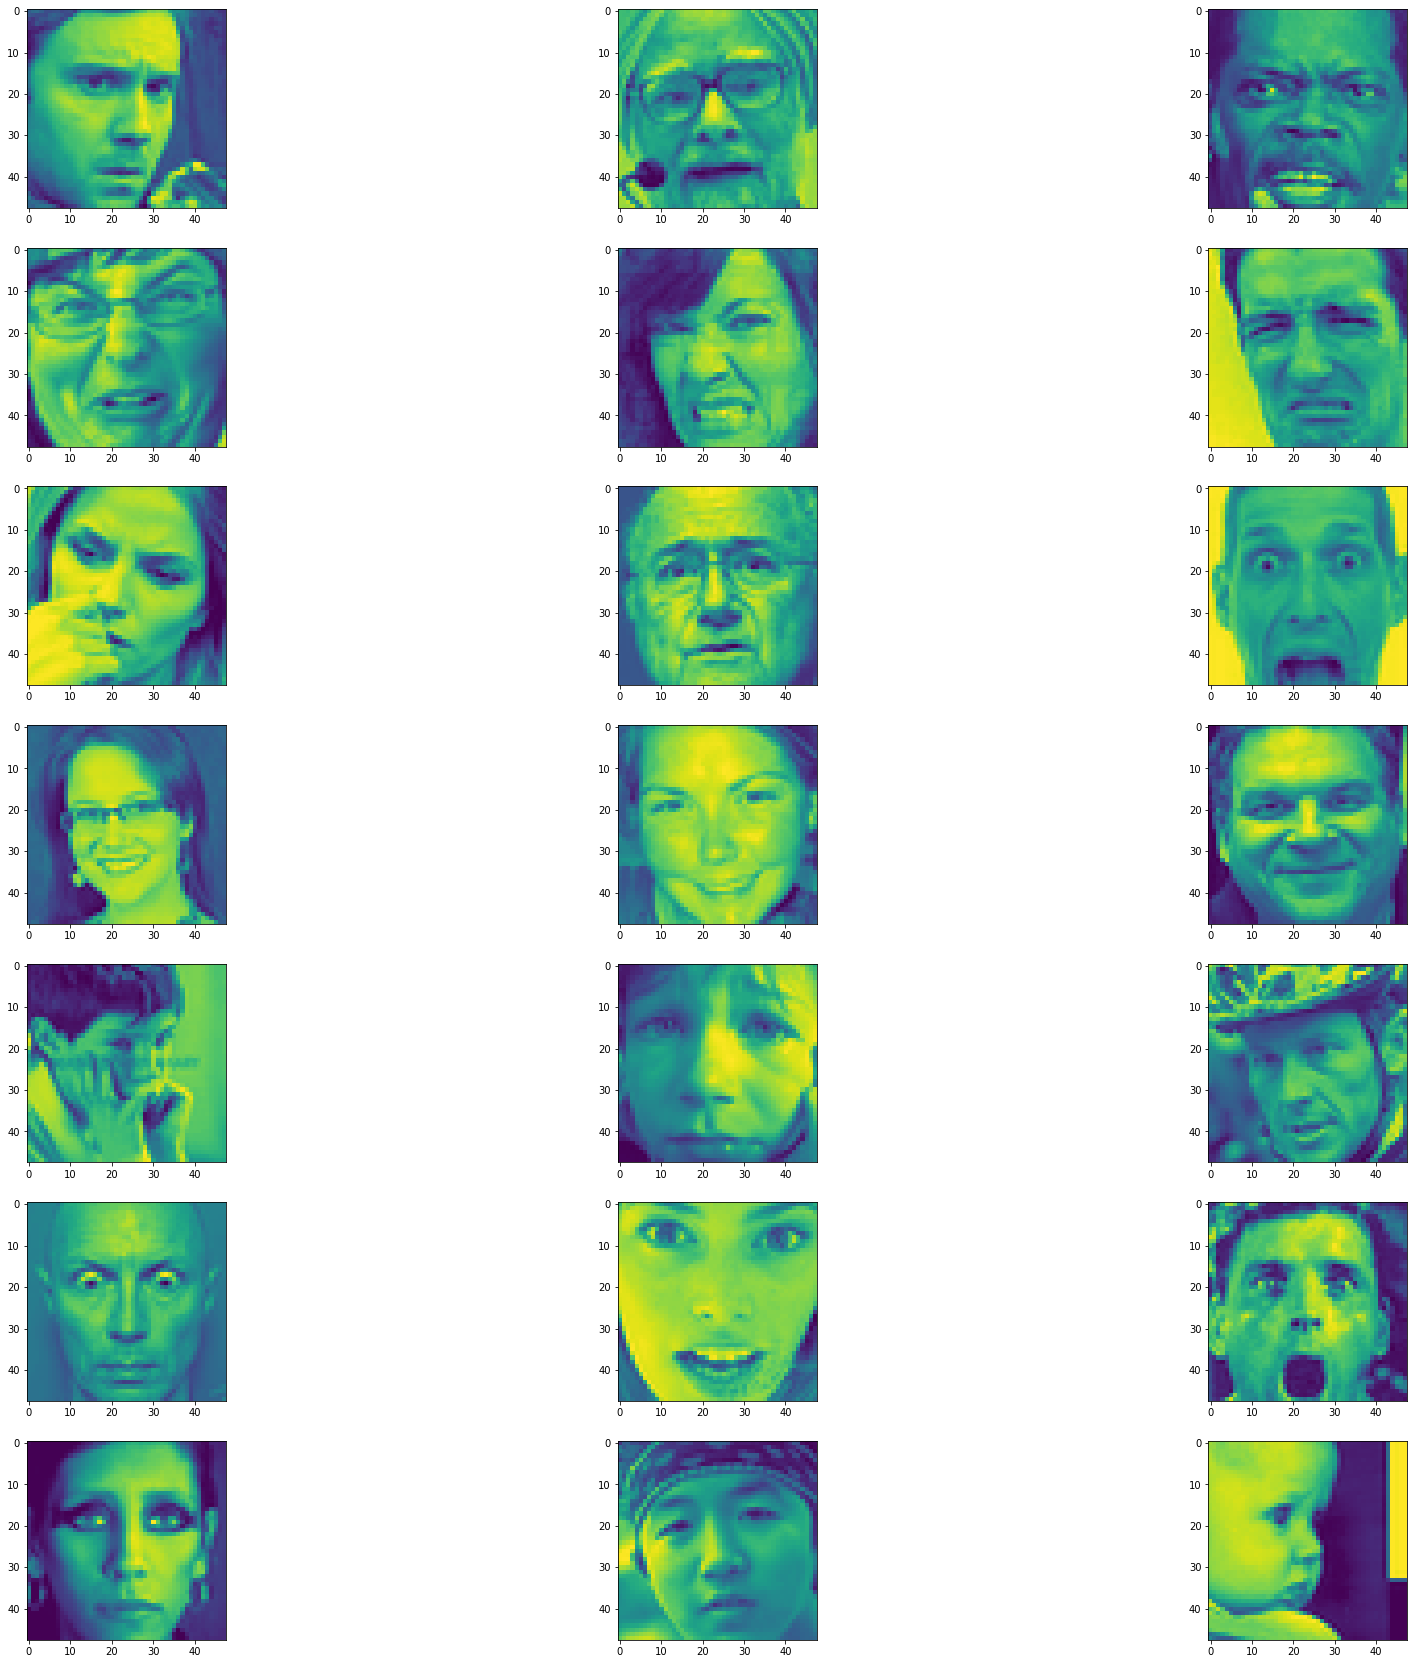

In [10]:
# we get the list of emotions ie. 0, 2, 4, 6, 3, 5, 1 and we sort them in ascending order 
emotion_list = data['emotion'].unique()
emotion_list.sort()



#we create a grid and we now start plotting our images
f, axarr = plt.subplots(7,3, figsize=(30,30))

for i in emotion_list:
  count = 0
  iterate = 0
  while count < 3:
    if data["emotion"][iterate] != i:
      iterate += 1
      continue
    else:
      axarr[i,count].imshow(data["pixels"][iterate])
      iterate += 1
      count += 1
    

We now know that 

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral.

Lets add these strings to the dataframe in a new column called emotion_face

In [11]:
emotion_face_list = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

data["Emotion_face"] = -1
for i in range(len(data)):
  if data["emotion"][i] == 0:
    data["Emotion_face"][i] = emotion_face_list[0]
  elif data["emotion"][i] == 1:
    data["Emotion_face"][i] = emotion_face_list[1]
  elif data["emotion"][i] == 2:
    data["Emotion_face"][i] = emotion_face_list[2]
  elif data["emotion"][i] == 3:
    data["Emotion_face"][i] = emotion_face_list[3]
  elif data["emotion"][i] == 4:
    data["Emotion_face"][i] = emotion_face_list[4]
  elif data["emotion"][i] == 5:
    data["Emotion_face"][i] = emotion_face_list[5]
  else:
    data["Emotion_face"][i] = emotion_face_list[6]

# A sanity check to see if they're labeled correctly
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/loc

,emotion,pixels,Usage,Emotion_face
0,0,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...",Training,Angry
1,0,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...",Training,Angry
2,2,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...",Training,Fear
3,4,"[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...",Training,Sad
4,6,"[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Training,Neutral
...,...,...,...,...
35882,6,"[[50.0, 36.0, 17.0, 22.0, 23.0, 29.0, 33.0, 39...",PrivateTest,Neutral
35883,3,"[[178.0, 174.0, 172.0, 173.0, 181.0, 188.0, 19...",PrivateTest,Happy
35884,0,"[[17.0, 17.0, 16.0, 23.0, 28.0, 22.0, 19.0, 17...",PrivateTest,Angry
35885,3,"[[30.0, 28.0, 28.0, 29.0, 31.0, 30.0, 42.0, 68...",PrivateTest,Happy


In [12]:
# Find the first index of test data
for i in range(20000, 38000):
  if data["Usage"][i] != "Training":
    print("The first test index is ", i)
    break

The first test index is  28709


In [13]:
for i in range(len(data)):
  if data["Usage"][i] == "Training":
    data["Usage"][i] = "Train"
  else:
    data["Usage"][i] = "Test"
  
# Sanity check
print(data["Usage"][28708])
print(data["Usage"][28709])
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Train
Test


,emotion,pixels,Usage,Emotion_face
0,0,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...",Train,Angry
1,0,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...",Train,Angry
2,2,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...",Train,Fear
3,4,"[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...",Train,Sad
4,6,"[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Train,Neutral
...,...,...,...,...
35882,6,"[[50.0, 36.0, 17.0, 22.0, 23.0, 29.0, 33.0, 39...",Test,Neutral
35883,3,"[[178.0, 174.0, 172.0, 173.0, 181.0, 188.0, 19...",Test,Happy
35884,0,"[[17.0, 17.0, 16.0, 23.0, 28.0, 22.0, 19.0, 17...",Test,Angry
35885,3,"[[30.0, 28.0, 28.0, 29.0, 31.0, 30.0, 42.0, 68...",Test,Happy


One last data processing step we need to do would be to normalise the pixels. Currently, pixels values range from 0 to 255. We generally want values to be from 0 to 1 when dealing with neural networks.

In [14]:
img = data["pixels"][0]
print(img)

[[ 70.  80.  82. ...  52.  43.  41.]
 [ 65.  61.  58. ...  56.  52.  44.]
 [ 50.  43.  54. ...  49.  56.  47.]
 ...
 [ 91.  65.  42. ...  72.  56.  43.]
 [ 77.  82.  79. ... 105.  70.  46.]
 [ 77.  72.  84. ... 106. 109.  82.]]


In [15]:
data["pixels"] = data["pixels"]/255
data

,emotion,pixels,Usage,Emotion_face
0,0,"[[0.27450980392156865, 0.3137254901960784, 0.3...",Train,Angry
1,0,"[[0.592156862745098, 0.5882352941176471, 0.576...",Train,Angry
2,2,"[[0.9058823529411765, 0.8313725490196079, 0.61...",Train,Fear
3,4,"[[0.09411764705882353, 0.12549019607843137, 0....",Train,Sad
4,6,"[[0.01568627450980392, 0.0, 0.0, 0.0, 0.0, 0.0...",Train,Neutral
...,...,...,...,...
35882,6,"[[0.19607843137254902, 0.1411764705882353, 0.0...",Test,Neutral
35883,3,"[[0.6980392156862745, 0.6823529411764706, 0.67...",Test,Happy
35884,0,"[[0.06666666666666667, 0.06666666666666667, 0....",Test,Angry
35885,3,"[[0.11764705882352941, 0.10980392156862745, 0....",Test,Happy


We need to create the train and test data and labels

In [16]:
data["pixels"] = np.asarray(data["pixels"])

In [17]:
list_temp = []
for i in range(0,28709):
  list_temp.append(data["pixels"][i])

training_images = np.array(list_temp)
training_images = np.asarray(training_images)

In [47]:
training_labels = data["emotion"][0:28709]

In [19]:
list_temp = []
for i in range(28709, len(data)):
  list_temp.append(data["pixels"][i])

test_images = np.array(list_temp)
test_images = np.asarray(test_images)

In [60]:
test_labels = data["emotion"][28709:]

**We have finished processing our data and can now proceed with defining/creating the model.**

In [21]:
training_images= training_images.reshape(28709, 48, 48, 1)
test_images = test_images.reshape(7178, 48, 48, 1)

In [22]:
#sequential meaning the layers are stacked atop one another 
#padding='same'
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48, 48, 1), name = "layer1"),
    tf.keras.layers.MaxPooling2D(2, 2, name = "layer2", padding='same'),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', name = "layer3", padding='same'),
    tf.keras.layers.MaxPooling2D(2,2, name = "layer4", padding='same'),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', name = "layer5", padding='same'),
    tf.keras.layers.MaxPooling2D(2,2, name = "layer6", padding='same'),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', name = "layer7", padding='same'),
    tf.keras.layers.MaxPooling2D(2,2, name = "layer8", padding='same'),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', name = "layer9", padding='same'),
    tf.keras.layers.MaxPooling2D(2,2, name = "layer10"),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu', name = "layer11"),
    tf.keras.layers.Dense(units=100, name = "layer12"),
    tf.keras.layers.Dense(7, activation='softmax', name = "layer13")]) # neuron at this layer is 7 cos theres 7 lables/categories


#The model.summary() method call prints a summary of the network.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 46, 46, 16)        160       
_________________________________________________________________
layer2 (MaxPooling2D)        (None, 23, 23, 16)        0         
_________________________________________________________________
layer3 (Conv2D)              (None, 23, 23, 32)        4640      
_________________________________________________________________
layer4 (MaxPooling2D)        (None, 12, 12, 32)        0         
_________________________________________________________________
layer5 (Conv2D)              (None, 12, 12, 64)        18496     
_________________________________________________________________
layer6 (MaxPooling2D)        (None, 6, 6, 64)          0         
_________________________________________________________________
layer7 (Conv2D)              (None, 6, 6, 64)          3

In [56]:
#Create a model by first compiling it with an optimizer and loss function, then train it on your training data and labels. 

#The goal is to have the model figure out the relationship between the training data and its training labels. 

#Notice the use of metrics = as a parameter, this allows TensorFlow to report on the accuracy of the training 
#by checking the predicted results against the known answers (the labels).

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#When model.fit executes, you'll see loss and accuracy:
model.fit(training_images, training_labels, epochs=100)

Epoch 1/100
898/898 [==============================] - 9s 10ms/step - loss: 0.8715 - accuracy: 0.6720
Epoch 2/100
898/898 [==============================] - 9s 10ms/step - loss: 0.8525 - accuracy: 0.6757
Epoch 3/100
898/898 [==============================] - 8s 9ms/step - loss: 0.8045 - accuracy: 0.6989
Epoch 4/100
898/898 [==============================] - 8s 9ms/step - loss: 0.7689 - accuracy: 0.7132
Epoch 5/100
898/898 [==============================] - 8s 9ms/step - loss: 0.7362 - accuracy: 0.7270
Epoch 6/100
898/898 [==============================] - 8s 9ms/step - loss: 0.6923 - accuracy: 0.7422
Epoch 7/100
898/898 [==============================] - 8s 9ms/step - loss: 0.6778 - accuracy: 0.7475
Epoch 8/100
898/898 [==============================] - 8s 9ms/step - loss: 0.6326 - accuracy: 0.7680
Epoch 9/100
898/898 [==============================] - 8s 9ms/step - loss: 0.6057 - accuracy: 0.7735
Epoch 10/100
898/898 [==============================] - 8s 9ms/step - loss: 0.5932 - accu

In [57]:
#how well would the model perform against other data ie. the test data
model.evaluate(test_images, test_labels)

225/225 [==============================] - 1s 4ms/step - loss: 4.2424 - accuracy: 0.5382


[4.242380142211914, 0.53817218542099]

In [61]:
test_labels = test_labels.array

In [62]:
classifications = model.predict(test_images)
print(classifications[3])

#The output of the model is a list of 7 numbers.
#Those numbers are a probability that the value being classified is the corresponding label. 
#For example, the first value in the list is the probability that the emotion is of class 0 and the next is of class 1, 2, 3 ect...
#and so on. 
#Notice that they are all very low probabilities except one. Also, because of Softmax, all the probabilities in the list sum to 1.0.

print(test_labels[3])



[4.6146295e-05 9.0746461e-08 6.6075612e-05 2.3147641e-04 5.5934634e-02
 1.7525994e-06 9.4371974e-01]
6


In [ ]:
#plt.imshow(test_images[0])

In [93]:
from google.colab import files
from keras.preprocessing import image


rgb_weights = [0.2989, 0.5870, 0.1140]

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(48, 48))
  x = image.img_to_array(img)
  x = np.dot(x, rgb_weights)
  x = x.reshape(48, 48, 1)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classifications = model.predict(images)
  print(classifications)
  emotion_face_list = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
  max_prob = -10
  prob_index = -1
  for i in range(len(classifications[0])):
    if classifications[0][i] > max_prob:
      max_prob = classifications[0][i]
      prob_index = i
    else:
      continue
  
  print("The emotion shown is ", emotion_face_list[prob_index])



Saving photo6150013518989077547.jpg to photo6150013518989077547.jpg
[[0. 0. 0. 1. 0. 0. 0.]]
The emotion shown is  Happy
